In [1]:
from Graph import *
import matplotlib.pyplot as plt

## Vhodni podatki

Vhodne podatke preberemo iz datoteke, ki smo jo naredili s pomočjo nauty traces in ukaza geng -c n 

In [2]:
G = read_graph6("graph_examples/graphs_8.txt")


## Reševanje problema

Za vsak graf v seznamu `G` naredimo:
* Nastavimo naključne začetne uteži
* V kolikor obstajajo konflikti jih poizkušimo rešit s pomočjo *local search* algoritma. Kot parameter lahko dodamo tudi maksimalno globino
* V kolikor algoritem ne odstrani vseh konfliktov, si graf (oz njegov indeks) shranimo v seznam `not_solvable`.



11117


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


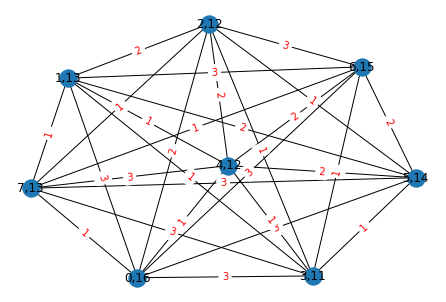

In [3]:
l = None
print(len(G))
not_solvable = []
for i in range(len(G)):
    g = Graph(G[i])
    g.randomize_weights()
    
    if len(g.conflicts) != 0:
        succ = g.solve(max_depth=10)
        if succ == False:
            not_solvable.append(i)
            l=g
           
if l is not None:       
    l.draw()

## Rezultati (za n=9)

Vseh povezanih grafov na 9 vozliščih je 261080. Ob klicu zgornjega postopka z `max_depth=0` algoritem ni uspel najti rešitve za približno 17000 grafov.

Z `max_depth=10` se je število grafov za katere algoritem ni našel rešitve zmanjšalo na 1877.

V spodnji celici je prikazan nek graf, za katerega algoritem ni našel rešitve (v mojem primeru je to kar $K_9$, saj se v enumeraciji pri kreiranju pojavi zadnji). Na tem grafu sem še enkrat pognal algoritem in ga je uspešno rešilo. To nakazuje v smeri, da bi zvečanje parametra `max_depth` verjetno vodilo v to, da bi rešilo vse grafe.

Kar pa se ne izkaže za resnično saj naprimer graf z indeksom $261077$ ni bil rešljiv tudi pri povečanju max_depth=100. Zgodi se namreč to, da se algoritem zacikla in se vedno prestavlja iz enega konflikta v drugega.

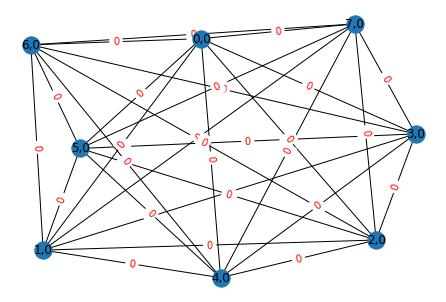

End of execution
False


In [4]:

l = Graph(G[not_solvable[-1]])
l.draw()

g = solve_recursive(l)
print(g)


In [ ]:
l.conflicts

In [ ]:
not_s = G[261077]
g1 = Graph(not_s)
g1.unit_weights(1)
g1.draw()

In [ ]:
g1.solve(max_depth = 10)
g1.draw()
g1.conflicts